# LIFE EXPECTANCY PREDICTON

Life expectancy means the estimation of the numbers of years the individual will survive. It further depends on age, sex and location where the person is living.It also helps in the treatment of patients which are underlying with certain diseases or illness. For eg. by predicting life expectancy we can analyze the aggresiveness of any disease.
 
 A large amount of data that is generated today is unstructured, which requires processing to generate insights. After pre processing the dataset we will remove the noise from it. After removing the noise we will clean the dataset.

IBM Watson, machine learning and node red are an integral part of an analysis.The end product will be a web page where you need to give all the required inputs and then submit it. Afterwards it will predict the life expectancy value based on regression technique.

In [8]:
#import basic libraries for preprocessing
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format='{:.5f}'.format
import warnings
import math
from tqdm import tqdm
#import libraries for pipelining
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
#import libraries for train and test
from sklearn.model_selection import train_test_split
#import ExtraTreesRegressor for model fit and prediction
from sklearn.ensemble import ExtraTreesRegressor
#import libraries for accuracy and error calculation
#from sklearn.metrics import mean_squared_error,r2_score,
#import libraries for model building and deployment
from watson_machine_learning_client import WatsonMachineLearningAPIClient

# IMPORTING DATASET

In [9]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

client_6f7561e8fd554f5ebba01fbfb5d35a39 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='v3EL7NWkSF1ugF1sMvyg3_kdAkcCXzNcOtsFDYo0aH9h',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6f7561e8fd554f5ebba01fbfb5d35a39.get_object(Bucket='lifeexpectancy-donotdelete-pr-luxls4alviufck',Key='Life expectancy.csv')['Body']
# adding missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.00000,263.00000,62,0.01000,71.27962,65.00000,1154,...,6.00000,8.16000,65.00000,0.10000,584.25921,33736494.00000,17.20000,17.30000,0.47900,10.10000
1,Afghanistan,2014,Developing,59.90000,271.00000,64,0.01000,73.52358,62.00000,492,...,58.00000,8.18000,62.00000,0.10000,612.69651,327582.00000,17.50000,17.50000,0.47600,10.00000
2,Afghanistan,2013,Developing,59.90000,268.00000,66,0.01000,73.21924,64.00000,430,...,62.00000,8.13000,64.00000,0.10000,631.74498,31731688.00000,17.70000,17.70000,0.47000,9.90000
3,Afghanistan,2012,Developing,59.50000,272.00000,69,0.01000,78.18422,67.00000,2787,...,67.00000,8.52000,67.00000,0.10000,669.95900,3696958.00000,17.90000,18.00000,0.46300,9.80000
4,Afghanistan,2011,Developing,59.20000,275.00000,71,0.01000,7.09711,68.00000,3013,...,68.00000,7.87000,68.00000,0.10000,63.53723,2978599.00000,18.20000,18.20000,0.45400,9.50000


# DATA PREPROCESSING

In [10]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
#THERE IS INCONSISTENCY IN COLUMN NAMES IN THIS DATASET SO WE HAVE TO CHANGE THEM TO A COMMON FORMAT
df=df.rename(columns={'Life expectancy ':'Life expectancy','Measles ':'Measles',' BMI ':'BMI','under-five deaths ':'under-five deaths','Diphtheria ':'Diphtheria',' HIV/AIDS':'HIV/AIDS',' thinness  1-19 years':'thinness  1-19 years',' thinness 5-9 years':'thinness 5-9 years'})

In [12]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
#CHECKING NULL VALUES
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [14]:
#FILL NULL VALUES TO AVOID TRAINING AND TESTING ERROR
df=df.fillna(df.mean())

In [15]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

# DATA VISUALIZATION

In [16]:
#PLOTTING A HEATMAP 
df_cor=df.corr()
plt.figure(figsize=(10,10))
#sns.heatmap(df_cor,annot=True,linewidth=0.1)

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [17]:
#PLOTTING A PAIRPLOT
#sns.pairplot(df)

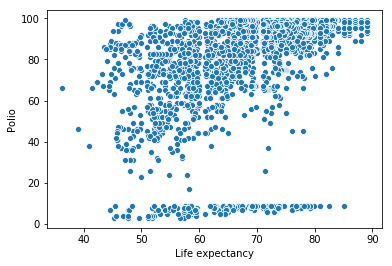

In [18]:
sns.scatterplot(x=df['Life expectancy'],y=df['Polio'])

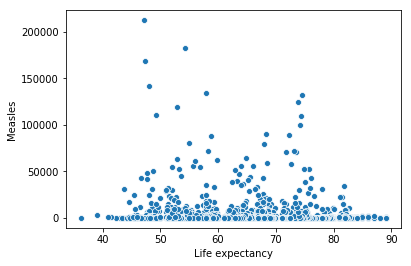

In [19]:
sns.scatterplot(x=df['Life expectancy'],y=df['Measles'])

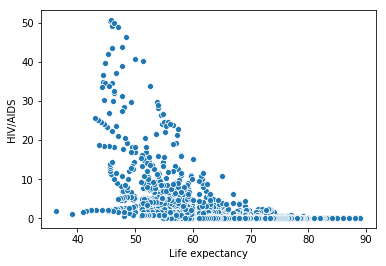

In [20]:
sns.scatterplot(x=df['Life expectancy'],y=df['HIV/AIDS'])

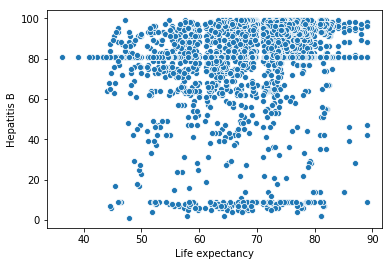

In [21]:
sns.scatterplot(x=df['Life expectancy'],y=df['Hepatitis B'])

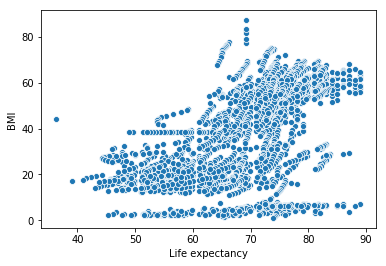

In [22]:
sns.scatterplot(x=df['Life expectancy'],y=df['BMI'])

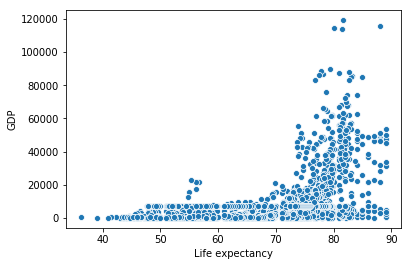

In [23]:
sns.scatterplot(x=df['Life expectancy'],y=df['GDP'])

In [24]:
df.describe(include= 'O')

,Country,Status
count,2938,2938
unique,193,2
top,Mongolia,Developing
freq,16,2426


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
BMI                                2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
HIV/AIDS                           2938 non-null

# TRAINING AND TESTING

In [26]:
#SEPARATING THE DATASET INTO DEPENDENT COLUMNS AND PREDICTION COLUMN
Y=df["Life expectancy"]
X=df[df.columns.difference(['Life expectancy'])]

In [27]:
#VIEWING NUMERICAL COLUMNS
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [28]:
#VIEWING CATEGORICAL COLUMNS
df.select_dtypes(include=['object', 'bool']).columns

Index(['Country', 'Status'], dtype='object')

In [29]:
#IDENTIFYING THE CATEGORICAL VALUES FOR COLUMNTRANSFORM
categorical_features = ['Country', 'Status']
categorical_feature_mask = X.dtypes==object
categorical_features = X.columns[categorical_feature_mask].tolist()
#DEFINE CATEGORICAL PIPELINE
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

In [30]:
#IDENTIFY THE NUMERIC VALUES FOR COLUMNTRANSFORM
numeric_features = ['Year','Adult Mortality','infant deaths','Alcohol','percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure','Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years','Income composition of resources', 'Schooling']
numeric_feature_mask = X.dtypes!=object
numeric_features = X.columns[numeric_feature_mask].tolist()
#DEFINE NUMERIC PIPELINE
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

In [31]:
#PIPELINNING USING COLUMNTRANSFORM
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [32]:
#DEFINE A REGRESSOR MODEL USING PIPELINE FUNCTION
ExtraTreeRegressor = Pipeline([
     ('preprocessor', preprocessor),
     ('ExtraTreeRegressor', ExtraTreesRegressor(n_estimators=100, random_state=0))
])

In [33]:
#TRAIN-TEST SPLIT
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [34]:
#FIT THE TRAINING MODEL
reg = ExtraTreeRegressor.fit(X_train, Y_train)

In [35]:
#PREDICT THE TEST DATA VALUE
test_pred=reg.predict(X_test)

In [29]:
#ESTIMATING ERROR
print('Mean squared error: ',roomean_squared_error(Y_test, test_pred))
print('R2 score: ',r2_score(Y_test, test_pred)*100)

Mean squared error:  2.52572457545449
R2 score:  97.08049135202975


# MODEL BUILDING AND DEPLOYMENT

In [36]:

wml_credentials={
 "apikey": "vPn5EDq-vwGCqQgHjRydg6FLI34qUntLBvyLkg_rlvr_",
 "instance_id": "e22bf587-f0d1-4598-a3ff-7c36e45eecc9",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}
client = WatsonMachineLearningAPIClient(wml_credentials)
print(client.service_instance.get_url())

https://eu-gb.ml.cloud.ibm.com


In [37]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "sumit", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "sumit0du@gmail.com", 
               client.repository.ModelMetaNames.NAME: "new_model1"}
#STORE THE MACHINE LEARNING MODEL
model_artifact=client.repository.store_model(ExtraTreeRegressor, meta_props=model_props)

In [38]:
#GET MODEL UID
model_uid = client.repository.get_model_uid(model_artifact)
#DEPLOY THE MODEL
create_deployment = client.deployments.create(model_uid, name="prediction")



#######################################################################################

Synchronous deployment creation for uid: 'e4d529a4-ca60-420a-81b3-e160bc119a0e' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='a87d9ffe-1c08-4029-b17d-d7b9e71da255'
------------------------------------------------------------------------------------------------




In [39]:
#GET SCORING END-POINT URL
scoring_endpoint = client.deployments.get_scoring_url(create_deployment)
print(scoring_endpoint)

https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/e22bf587-f0d1-4598-a3ff-7c36e45eecc9/deployments/a87d9ffe-1c08-4029-b17d-d7b9e71da255/online


In [40]:
#TEST THE DEPLOYMENT
scoring_payload = {"fields": ['BMI', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years',
       'Adult Mortality', 'Alcohol', 'Country', 'Diphtheria ', 'GDP',
       'Hepatitis B', 'Income composition of resources', 'Measles ', 'Polio',
       'Population', 'Schooling', 'Status', 'Total expenditure', 'Year',
       'infant deaths', 'percentage expenditure', 'under-five deaths '],"values":[[19.1,0.1,17.2,17.3,263,0.01,'Afghanistan',65,584.25,65,0.47,1154,6,33736494,10,'Developing',8.16,2015,62,71.27,83]]}
predictions = client.deployments.score(scoring_endpoint, scoring_payload)
print(predictions)

{'fields': ['prediction'], 'values': [[63.09]]}
